In [4]:
base_dir = 'C:\\Projects\\ature'
import os
os.chdir(base_dir) #BASE DIRECTORY
import numpy as np
from commons.IMAGE import Image
import preprocess.utils.img_utils as imgutil
import PIL.Image as IMG
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
### DRIVE dataset path setup #####
data_file_path = 'data\\DRIVE\\test\\images'
mask_path = 'data\\DRIVE\\test\\mask'
ground_truth_path = 'data\\DRIVE\\test\\1st_manual'
segmented_file_path = 'data\\DRIVE\\drive_segmented'

def get_mask_file(file_name): 
    return file_name.split('_')[0] + '_test_mask.gif'

def get_ground_truth_file(file_name): 
    return file_name.split('_')[0] + '_manual1.gif'

def get_segmented_file(file_name):
    return file_name + '.PNG'

input_image = '05_test.tif'

In [6]:
img_obj = Image()

img_obj.load_file(data_dir=data_file_path, file_name=input_image)
img_obj.load_mask(mask_dir=mask_path, fget_mask=get_mask_file, erode=True)
img_obj.load_ground_truth(gt_dir=ground_truth_path, fget_ground_truth=get_ground_truth_file)

segmented = IMG.open(os.path.join(segmented_file_path, get_segmented_file(input_image)))
img_obj.res['segmented'] = np.array(segmented.getdata(), np.uint8).reshape(segmented.size[1], segmented.size[0], 1)[:, :, 0]

img_obj.working_arr = img_obj.image_arr[:, :, 1]

Mask loaded: 05_test_mask.gif
Ground truth loaded: 05_manual1.gif


In [7]:
def get_lable(i , j, arr_2d, truth):
    if arr_2d[i, j] == 255 and truth[i, j] == 255:
        return 'w'
    if arr_2d[i, j] == 255 and truth[i, j] == 0:
        return 'g'
    if arr_2d[i, j] == 0 and truth[i, j] == 255:
        return 'r'
    if arr_2d[i, j] == 0 and truth[i, j] == 0:
        return 'b'

In [14]:
base_out = os.path.join('out', 'patches')
out_dir = os.path.join(base_out, img_obj.file_name.split('.')[0])
if os.path.isdir(out_dir) is False:
    os.mkdir(out_dir)

os.chdir(out_dir)

img = img_obj.working_arr.copy()
k_size = 51
k_half = 25
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        
        patch = np.full((k_size,k_size), 0, dtype=np.uint8)
        patch_exceeds_mask = False
        
        for k in range(-k_half, k_half+1, 1):
             for l in range(-k_half, k_half+1, 1):
                    
                    if patch_exceeds_mask:
                        continue
                    
                    patch_i = i + k
                    patch_j = j + l
                    
                    if patch_i >= 0 and patch_j >= 0 and patch_i < img.shape[0] and patch_j < img.shape[1]:
                        
                        if img_obj.mask[patch_i, patch_j] == 0:
                            patch_exceeds_mask = True
                        
                        patch[k_half + k, k_half + l] = img[patch_i, patch_j]
                        
        if not patch_exceeds_mask:
            IMG.fromarray(patch).save(str(i) + '_' + str(j) + '_' + get_lable(i , j, img_obj.res['segmented'], img_obj.ground_truth) +  '.PNG')

KeyboardInterrupt: 

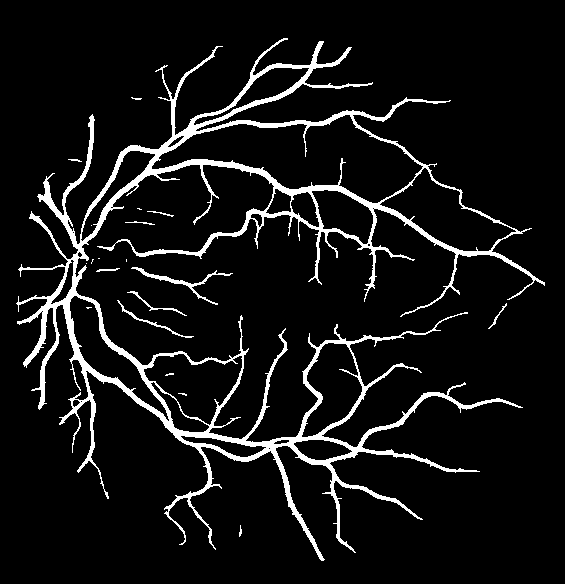

In [81]:
IMG.fromarray(img_obj.res['segmented'])